In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('Digit Recognizer.csv')

In [3]:
df.head()

label  pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  \
0      1       0       0       0       0       0       0       0       0   
1      0       0       0       0       0       0       0       0       0   
2      1       0       0       0       0       0       0       0       0   
3      4       0       0       0       0       0       0       0       0   
4      0       0       0       0       0       0       0       0       0   

   pixel8  ...  pixel774  pixel775  pixel776  pixel777  pixel778  pixel779  \
0       0  ...         0         0         0         0         0         0   
1       0  ...         0         0         0         0         0         0   
2       0  ...         0         0         0         0         0         0   
3       0  ...         0         0         0         0         0         0   
4       0  ...         0         0         0         0         0         0   

   pixel780  pixel781  pixel782  pixel783  
0         0         0         0         0  
1         0         0         0         0  
2         0         0         0         0  
3         0         0         0         0  
4         0         0         0         0  

[5 rows x 785 columns]

In [4]:
df.shape

(42000, 785)

In [5]:
X = df.iloc[:,1:]
y = df.iloc[:,0]

In [6]:
X

pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  \
0           0       0       0       0       0       0       0       0       0   
1           0       0       0       0       0       0       0       0       0   
2           0       0       0       0       0       0       0       0       0   
3           0       0       0       0       0       0       0       0       0   
4           0       0       0       0       0       0       0       0       0   
...       ...     ...     ...     ...     ...     ...     ...     ...     ...   
41995       0       0       0       0       0       0       0       0       0   
41996       0       0       0       0       0       0       0       0       0   
41997       0       0       0       0       0       0       0       0       0   
41998       0       0       0       0       0       0       0       0       0   
41999       0       0       0       0       0       0       0       0       0   

       pixel9  ...  pixel774  pixel775  pixel776  pixel777  pixel778  \
0           0  ...         0         0         0         0         0   
1           0  ...         0         0         0         0         0   
2           0  ...         0         0         0         0         0   
3           0  ...         0         0         0         0         0   
4           0  ...         0         0         0         0         0   
...       ...  ...       ...       ...       ...       ...       ...   
41995       0  ...         0         0         0         0         0   
41996       0  ...         0         0         0         0         0   
41997       0  ...         0         0         0         0         0   
41998       0  ...         0         0         0         0         0   
41999       0  ...         0         0         0         0         0   

       pixel779  pixel780  pixel781  pixel782  pixel783  
0             0         0         0         0         0  
1             0         0         0         0         0  
2             0         0         0         0         0  
3             0         0         0         0         0  
4             0         0         0         0         0  
...         ...       ...       ...       ...       ...  
41995         0         0         0         0         0  
41996         0         0         0         0         0  
41997         0         0         0         0         0  
41998         0         0         0         0         0  
41999         0         0         0         0         0  

[42000 rows x 784 columns]

In [7]:
y

0        1
1        0
2        1
3        4
4        0
        ..
41995    0
41996    1
41997    7
41998    6
41999    9
Name: label, Length: 42000, dtype: int64

In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=4)

# KNN without PCA

In [9]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()

In [10]:
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)

In [11]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test,y_pred)

0.9647619047619047

# KNN with PCA

In [12]:
# Standardizing

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

In [13]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 1. Finding the optimal value of Principal Components

In [14]:
from sklearn.decomposition import PCA

In [15]:
pca = PCA(n_components=None)           # maximum components = total dimensions

X_train_trf = pca.fit_transform(X_train)
X_test_trf = pca.transform(X_test)

In [16]:
pca.components_.shape      # Eigen vectors

(784, 784)

In [17]:
pca.explained_variance_      # Eigen values

array([4.09000090e+01, 2.91552618e+01, 2.67588677e+01, 2.08034956e+01,
       1.80007447e+01, 1.58704171e+01, 1.37087748e+01, 1.24921132e+01,
       1.10772505e+01, 1.01744559e+01, 9.61915827e+00, 8.61281217e+00,
       8.10842983e+00, 7.92152271e+00, 7.44579095e+00, 7.15631818e+00,
       6.75800912e+00, 6.61535468e+00, 6.45557819e+00, 6.30786673e+00,
       5.96824088e+00, 5.71605006e+00, 5.45720002e+00, 5.32734073e+00,
       5.18400789e+00, 4.96496248e+00, 4.94191464e+00, 4.69595151e+00,
       4.49686533e+00, 4.40286799e+00, 4.31489604e+00, 4.22441489e+00,
       4.08621114e+00, 4.07062722e+00, 4.05006320e+00, 3.93623669e+00,
       3.83614969e+00, 3.70426817e+00, 3.61203189e+00, 3.51110614e+00,
       3.41183183e+00, 3.40095612e+00, 3.34580331e+00, 3.29337287e+00,
       3.24927812e+00, 3.19748142e+00, 3.14648824e+00, 3.12045543e+00,
       3.06965839e+00, 2.98171894e+00, 2.93421416e+00, 2.87924287e+00,
       2.84793276e+00, 2.80523159e+00, 2.77230006e+00, 2.70939220e+00,
      

In [18]:
pca.explained_variance_ratio_

array([5.84265969e-02, 4.16489573e-02, 3.82256536e-02, 2.97182685e-02,
       2.57144748e-02, 2.26712533e-02, 1.95832979e-02, 1.78452690e-02,
       1.58241053e-02, 1.45344426e-02, 1.37411873e-02, 1.23035989e-02,
       1.15830772e-02, 1.13160761e-02, 1.06364824e-02, 1.02229640e-02,
       9.65397036e-03, 9.45018524e-03, 9.22194088e-03, 9.01093168e-03,
       8.52576840e-03, 8.16550805e-03, 7.79573485e-03, 7.61022790e-03,
       7.40547366e-03, 7.09256229e-03, 7.05963792e-03, 6.70827397e-03,
       6.42387482e-03, 6.28959748e-03, 6.16392753e-03, 6.03467315e-03,
       5.83724593e-03, 5.81498394e-03, 5.78560778e-03, 5.62300401e-03,
       5.48002743e-03, 5.29163167e-03, 5.15987004e-03, 5.01569531e-03,
       4.87387968e-03, 4.85834348e-03, 4.77955643e-03, 4.70465835e-03,
       4.64166800e-03, 4.56767524e-03, 4.49483030e-03, 4.45764185e-03,
       4.38507712e-03, 4.25945360e-03, 4.19159194e-03, 4.11306420e-03,
       4.06833699e-03, 4.00733739e-03, 3.96029395e-03, 3.87042863e-03,
      

In [19]:
np.cumsum(pca.explained_variance_ratio_)

array([0.0584266 , 0.10007555, 0.13830121, 0.16801948, 0.19373395,
       0.2164052 , 0.2359885 , 0.25383377, 0.26965788, 0.28419232,
       0.29793351, 0.31023711, 0.32182018, 0.33313626, 0.34377274,
       0.3539957 , 0.36364968, 0.37309986, 0.3823218 , 0.39133273,
       0.3998585 , 0.40802401, 0.41581974, 0.42342997, 0.43083545,
       0.43792801, 0.44498765, 0.45169592, 0.45811979, 0.46440939,
       0.47057332, 0.47660799, 0.48244524, 0.48826022, 0.49404583,
       0.49966883, 0.50514886, 0.51044049, 0.51560036, 0.52061606,
       0.52548994, 0.53034828, 0.53512784, 0.5398325 , 0.54447417,
       0.54904184, 0.55353667, 0.55799431, 0.56237939, 0.56663884,
       0.57083044, 0.5749435 , 0.57901184, 0.58301917, 0.58697947,
       0.5908499 , 0.5946782 , 0.5984035 , 0.60208639, 0.60569336,
       0.6092591 , 0.61278481, 0.61624939, 0.61968148, 0.62304753,
       0.62639499, 0.62970052, 0.63291347, 0.63611487, 0.63930157,
       0.64244845, 0.64559223, 0.64866729, 0.65172163, 0.65471

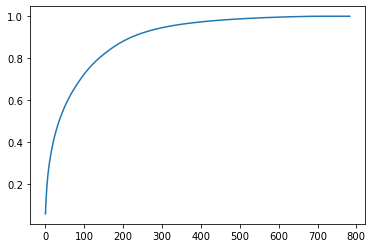

In [20]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))           # x-axis : no. of principal components
                                                             # y-axis : cumulative sum of explained variance
    
                                                     # optimal no. of principal components = point at which variance is 90$
                                                     # (here 223)

# 2. Performing PCA

In [21]:
pca = PCA(n_components=224)

X_train_trf = pca.fit_transform(X_train)
X_test_trf = pca.transform(X_test)

In [22]:
pca.components_.shape      # Eigen vectors

(224, 784)

In [23]:
np.cumsum(pca.explained_variance_ratio_)

array([0.0584266 , 0.10007555, 0.13830121, 0.16801948, 0.19373395,
       0.2164052 , 0.2359885 , 0.25383377, 0.26965788, 0.28419232,
       0.29793351, 0.31023711, 0.32182018, 0.33313626, 0.34377274,
       0.3539957 , 0.36364968, 0.37309986, 0.3823218 , 0.39133273,
       0.3998585 , 0.40802401, 0.41581974, 0.42342997, 0.43083545,
       0.43792801, 0.44498765, 0.45169592, 0.45811979, 0.46440939,
       0.47057332, 0.47660799, 0.48244524, 0.48826022, 0.49404583,
       0.49966883, 0.50514886, 0.51044049, 0.51560036, 0.52061606,
       0.52548994, 0.53034828, 0.53512784, 0.5398325 , 0.54447416,
       0.54904184, 0.55353667, 0.55799431, 0.56237939, 0.56663884,
       0.57083043, 0.5749435 , 0.57901183, 0.58301917, 0.58697946,
       0.59084989, 0.5946782 , 0.59840349, 0.60208638, 0.60569335,
       0.60925908, 0.6127848 , 0.61624938, 0.61968146, 0.62304752,
       0.62639496, 0.62970049, 0.63291344, 0.63611484, 0.63930154,
       0.64244841, 0.64559219, 0.64866724, 0.65172158, 0.65471

# 3. Performing KNN

In [24]:
knn = KNeighborsClassifier()

knn.fit(X_train_trf,y_train)
y_pred = knn.predict(X_test_trf)

In [25]:
accuracy_score(y_test,y_pred)

0.9443650793650794

# 4. Visualization in 3D

In [26]:
# transforming in 3D

pca = PCA(n_components=3)
X_train_trf = pca.fit_transform(X_train)
X_test_trf = pca.transform(X_test)

In [27]:
import plotly.express as px
y_train_trf = y_train.astype(str)
fig = px.scatter_3d(df, x=X_train_trf[:,0], y=X_train_trf[:,1], z=X_train_trf[:,2],
              color=y_train_trf)
fig.update_layout(
    margin=dict(l=20, r=20, t=20, b=20),
    paper_bgcolor="LightSteelBlue",
)
fig.show()

In [28]:
pca.components_.shape
# Eigen vectors

(3, 784)

In [29]:
pca.explained_variance_
# Eigen values

array([40.90000896, 29.15526176, 26.75886738])

In [30]:
pca.explained_variance_.shape

(3,)

In [31]:
pca.explained_variance_ratio_

array([0.0584266 , 0.04164896, 0.03822565])